In [2]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import os
from fonctions import *

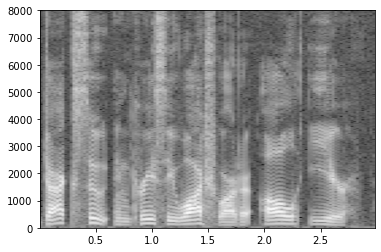

In [3]:
waveform, sample_rate = torchaudio.load("../Data/meme_taille_TEST/sig_1_10.WAV")
spec_br, f_br, t_br, im_br = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = True, mode = 'psd', cmap = 'gray')

In [3]:
######################### MEME TAILLE DE SIGNAUX

"""taille_sig("../Data/speech_TEST/TIMIT_TEST/DR1")
taille_sig("../Data/speech_TEST/TIMIT_TEST/DR2")
taille_sig("../Data/speech_TEST/TIMIT_TEST/DR3")
taille_sig("../Data/speech_TEST/TIMIT_TEST/DR4")
taille_sig("../Data/speech_TEST/TIMIT_TEST/DR5")
taille_sig("../Data/speech_TEST/TIMIT_TEST/DR6")
taille_sig("../Data/speech_TEST/TIMIT_TEST/DR7")
taille_sig("../Data/speech_TEST/TIMIT_TEST/DR8")"""

In [ ]:
####################### SIGNAUX NON BRUITÉS

"""for subdir, dirs, files in os.walk("../Data/meme_taille_TEST"):
    for file in files:
            subpath = os.path.join(subdir, file)
            waveform, sample_rate = torchaudio.load(subpath)
            spec, f, t, im = plt.specgram(waveform[0].t().numpy(), Fs = sample_rate, NFFT = 512, scale_by_freq = True, mode = 'psd', cmap = 'gray')
            
            #on ajoute le spectro au dossier
             
            path_list = subpath.split("/")
            br_name = 'nb_' + path_list[3][:-3] + 'bin'

            np.savetxt('../Data/sig/non_bruité/' + br_name, spec)
            m = np.loadtxt("Image.bin")
            plt.axis('off')
            plt.savefig('../Data/sig/non_bruité/' + br_name,bbox_inches='tight')
            plt.clf()
            plt.cla()"""
            
######################## BRUITAGE DES SIGNAUX

RSB = input('entrer le RSB voulu')
bruit, sample_rate_bruit = torchaudio.load("../Data/babble.wav")
bruit_rs = torchaudio.transforms.Resample(sample_rate_bruit, 16000)(bruit)
for subdir, dirs, files in os.walk("../Data/meme_taille_TEST"):
    for file in files:
        if ('.WAV' in file):
            subpath = os.path.join(subdir, file)
            save_bruit(subpath, bruit, bruit_rs, RSB)
   

entrer le RSB voulu 0.7


b_sig_3_48.bin
b_sig_2_45.bin
b_sig_3_18.bin
b_sig_4_173.bin
b_sig_8_23.bin
b_sig_5_240.bin
b_sig_2_35.bin
b_sig_1_57.bin
b_sig_4_151.bin
b_sig_8_13.bin
b_sig_2_44.bin
b_sig_8_74.bin
b_sig_2_90.bin
b_sig_5_207.bin
b_sig_4_55.bin
b_sig_2_88.bin
b_sig_4_166.bin
b_sig_7_71.bin
b_sig_2_7.bin
b_sig_4_232.bin
b_sig_6_90.bin
b_sig_3_195.bin
b_sig_6_16.bin
b_sig_4_128.bin
b_sig_2_48.bin
b_sig_1_91.bin
b_sig_2_232.bin
b_sig_2_200.bin
b_sig_5_200.bin
b_sig_4_53.bin
b_sig_3_236.bin
b_sig_2_150.bin
b_sig_5_123.bin
b_sig_5_124.bin
b_sig_7_52.bin
b_sig_1_40.bin
b_sig_3_32.bin
b_sig_6_79.bin
b_sig_8_14.bin
b_sig_2_243.bin
b_sig_5_74.bin
b_sig_3_92.bin
b_sig_5_261.bin
b_sig_3_42.bin
b_sig_6_69.bin
b_sig_7_186.bin
b_sig_5_144.bin
b_sig_4_261.bin
b_sig_6_60.bin
b_sig_6_106.bin
b_sig_7_219.bin
b_sig_1_97.bin
b_sig_7_113.bin
b_sig_3_235.bin
b_sig_2_193.bin
b_sig_2_92.bin
b_sig_5_257.bin
b_sig_6_7.bin
b_sig_4_181.bin
b_sig_7_146.bin
b_sig_3_45.bin
b_sig_6_11.bin
b_sig_3_260.bin
b_sig_5_248.bin
b_sig_6_50.b

In [2]:
############################### MISE EN PLACE DU CNN
import torch
from torch.autograd import Variable
from torch.optim import Adam, SGD

import torch.nn as nn
import torch.optim as optim

batch_size = 5
epochs = 20
learning_rate = 1e-3

In [12]:
############################## CRÉATION DU DATASET

import torch
import torchvision
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import torchaudio
import numpy as np
import matplotlib.image as mpimg
from torch import tensor
import os
from torchvision.transforms import ToTensor
from PIL import Image 

def my_loader(filename):
    return np.loadtxt(filename, dtype=np.double)
    

data = torchvision.datasets.DatasetFolder('../Data/test', transform = ToTensor(), loader = my_loader, extensions = '.png')
test_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)

In [13]:
import torch.nn as nn
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer1 = nn.Conv2d(
            in_channels=1, out_channels=10, kernel_size=1
        )
        self.encoder_hidden_layer2 = nn.Conv2d(
            in_channels=10, out_channels=20, kernel_size=1
        )
        self.poolp = nn.MaxPool2d(
            kernel_size=2, padding=(1,1)
        )
        self.pool = nn.MaxPool2d(
            kernel_size=2
        )
        self.decoder_hidden_layer = nn.ConvTranspose2d(
            in_channels=20, out_channels=10, kernel_size=2, stride=2
        )
        self.decoder_output_layer = nn.ConvTranspose2d(
            in_channels=10, out_channels=1, kernel_size=2, stride=2
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer1(features)
        activation = torch.relu(activation)
        print("couche conv 1", activation.size())
        code = self.pool(activation)
        code = torch.relu(code)
        print("couche maxpool 1", code.size())
        activation = self.encoder_hidden_layer2(code)
        activation = torch.relu(activation)
        print("couche conv 2", activation.size())
        code = self.poolp(activation)
        code = torch.relu(code)
        print("couche maxpool 2", code.size())
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        print("couche decode 1", activation.size())
        reconstructed = self.decoder_output_layer(activation)
        reconstructed = torch.relu(reconstructed)
        print("couche decode 2", reconstructed.size())
        return reconstructed

In [14]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE().to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# mean-squared error loss
criterion = nn.MSELoss()

In [15]:
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in test_loader:
        
        batch_features = batch_features.to(device)
        print(batch_features.type())
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(torch.tensor(batch_features))
        print(outputs.size())
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(test_loader)
    
    # save the weigth
    torch.save(model.state_dict(), "model"+str(epoch))
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))

torch.FloatTensor


<ipython-input-15-79f593cadb35>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = model(torch.tensor(batch_features))


RuntimeError: Given groups=1, weight of size [10, 1, 1, 1], expected input[5, 4, 231, 349] to have 1 channels, but got 4 channels instead